**Emotion Detection in Twitter Data using NLP Techniques
 You have been given with a dataset of Twitter posts (tweets) that are labelled with specific emotions. Your objective is to develop a model that can accurately classify these tweets into different emotion categories such as joy, sadness, anger, fear, surprise etc.**
 **To achieve this, follow the steps outlined below:**
 **Data Preprocessing**

<b>
 ● FeatureExtraction

 ● ModelBuilding and Evaluation (Create different models, including deep learning models)

 ● Evaluate the Model's Performance</b>

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import html
import re
import unicodedata

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

**READING DATASET AND TAKING THE INFORMATIONS ABOUT THE DATASET**

In [2]:
#Reading the dataset
tweets_data=pd.read_csv("/content/tweet_emotions.csv")
tweets_data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
#Display the first few rows
tweets_data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
#Display the last few rows
tweets_data.tail()

,tweet_id,sentiment,content
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...


In [5]:
#shape of the datset
tweets_data.shape

(40000, 3)

In [6]:
#Display the columns present in the dataset
tweets_data.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [7]:
#General information about the dataset
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


**DATA CLEANING AND DATA PREPROCESSING**

In [8]:
#Checking if any null values present in the dataset
tweets_data.isnull().sum()

,0
tweet_id,0
sentiment,0
content,0


**There is no null values present in the dataset**

In [9]:
#The column 'tweet_id' is unnecessary column.so drop it.
tweets_data = tweets_data.drop(columns='tweet_id')

In [10]:
#After removal of the column 'tweet_id' again print the columns name
print(tweets_data.columns)

Index(['sentiment', 'content'], dtype='object')


In [11]:
# Filter out rows with missing content to ensure only valid content
tweets_data = tweets_data[tweets_data['content'].notnull()]

In [12]:
#count the missing values again
tweets_data.isnull().sum()

,0
sentiment,0
content,0


In [13]:
#count the values in the column 'sentiment'
tweets_data['sentiment'].value_counts()

,count
sentiment,
neutral,8638
worry,8459
happiness,5209
sadness,5165
love,3842
surprise,2187
fun,1776
relief,1526
hate,1323


/tmp/ipython-input-1360665534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tweets_data, x='sentiment', palette='Set2')


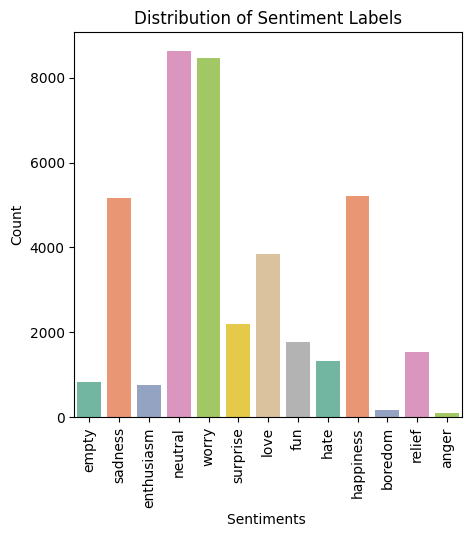

In [14]:
# Countplot  for the column 'sentiment'
plt.figure(figsize=(5,5))
sns.countplot(data=tweets_data, x='sentiment', palette='Set2')

plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiments ')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**FEATURE EXTRACTION**

TEXT PREPROCESSING

In [15]:
# Download stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
negation_words = {"not", "no", "nor", "never"}
stop_words = set(stopwords.words('english')) - negation_words
lemmatizer = WordNetLemmatizer()

In this step include converting lower cases,removing mentions,decode html entities,remove non AS-CII,remove non-english  characters,hastags,mentions,links,symbols,punctuations,numbers,stowords etc.

In [17]:
def preprocess_text(text):
    text = str(text).lower() # Lowercase
    text = re.sub(r'@\w+', '', text) # Remove mentions
    text = html.unescape(text)  # Decode HTML entities
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8') # Remove non-ASCII

    words = text.split() # Tokenize manually by splitting on spaces
    # Remove URLs and mentions/hashtags
    words = [word for word in words if not (
        word.startswith('#') or 'http' in word or 'www' in word or
        'link' in word or '{' in word or '}' in word)]

    # Remove punctuation and numbers
    clean = []
    for word in words:
        word_alpha = ''.join(char for char in word if char.isalpha())
        if word_alpha and word_alpha not in stop_words:
            clean.append(lemmatizer.lemmatize(word_alpha))
    # Join words back into a string
    return ' '.join(clean)

**APPLY PREPROCESSING**

In [18]:
# Clean the tweet_text column
tweets_data['preprocessed'] = tweets_data['content'].apply(preprocess_text)

In [19]:
print(tweets_data)

        sentiment                                            content  \
0           empty  @tiffanylue i know  i was listenin to bad habi...   
1         sadness  Layin n bed with a headache  ughhhh...waitin o...   
2         sadness                Funeral ceremony...gloomy friday...   
3      enthusiasm               wants to hang out with friends SOON!   
4         neutral  @dannycastillo We want to trade with someone w...   
...           ...                                                ...   
39995     neutral                                   @JohnLloydTaylor   
39996        love                     Happy Mothers Day  All my love   
39997        love  Happy Mother's Day to all the mommies out ther...   
39998   happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
39999        love  @mopedronin bullet train from tokyo    the gf ...   

                                            preprocessed  
0      know listenin bad habit earlier started freaki...  
1                

**VECTORIZATION**

In [20]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X = vectorizer.fit_transform(tweets_data['preprocessed'])

In [22]:
print(X.shape)

(40000, 5000)


In [24]:
#labelencoding
le = LabelEncoder()
y=le.fit_transform(tweets_data['sentiment'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
#printing Train labels and Test labela
print("Train labels:", np.unique(y_train))
print("Test labels :", np.unique(y_test))

Train labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Test labels : [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [27]:
#print the shape of the X_train_text
print(X_train.shape)

(32000, 5000)


In [28]:
#print the shape of the X_test_text
print(X_test.shape)

(8000, 5000)


**HANDLING CLASS IMBALANCE**

In [29]:
# Handle class imbalance
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights =dict(zip(np.unique(y_train),weights))

**MODEL BUILDING AND EVALUATION**

**1. Machine learning models**

In [30]:
#Importing libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [31]:
#creating loop for multiple classifier
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine":SVC(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "K-Nearest Neighbors":KNeighborsClassifier(n_neighbors=5)
}

In [32]:
# Results storage
results = []
trained_models = {}

# Loop through classifiers
for name, model in classifiers.items():
    print(f"\n Training: {name}")

    # Convert to dense only for GaussianNB
    if name == "Gaussian Naive Bayes":
        X_train_input = X_train.toarray()
        X_test_input = X_test.toarray()
    else:
        X_train_input = X_train
        X_test_input = X_test

    # Fit and predict
    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    print(f" Accuracy: {acc:.4f}")
    print(f" F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    # Store results
    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1
    })

    # Save trained model
    trained_models[name] = model

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)



 Training: Logistic Regression
 Accuracy: 0.2471
 F1 Score: 0.1964
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.04      0.19      0.06        36
           2       0.02      0.09      0.04       165
           3       0.04      0.16      0.07       152
           4       0.13      0.26      0.17       355
           5       0.34      0.23      0.27      1042
           6       0.20      0.39      0.26       265
           7       0.49      0.44      0.46       768
           8       0.41      0.20      0.27      1728
           9       0.13      0.29      0.18       305
          10       0.36      0.29      0.32      1033
          11       0.16      0.23      0.19       437
          12       0.44      0.19      0.27      1692

    accuracy                           0.25      8000
   macro avg       0.21      0.23      0.20      8000
weighted avg       0.35      0.25      0.27      8000


 Training:

In [33]:
# Display table
print("\n Model Performance Summary:")
print(results_df)


 Model Performance Summary:
                    Model  Accuracy  F1 Score
2  Support Vector Machine  0.318750  0.218388
3           Random Forest  0.318750  0.181639
0     Logistic Regression  0.247125  0.196428
4     K-Nearest Neighbors  0.220250  0.104150
1    Gaussian Naive Bayes  0.094375  0.083454


In [34]:
#Printing best model,accuracy,f1 score
best_model_row = results_df.iloc[0]
best_model_name = best_model_row['Model']
best_accuracy = best_model_row['Accuracy']
best_f1 = best_model_row['F1 Score']

print(f"\n Best Model: {best_model_name}")
print(f" Accuracy: {best_accuracy:.4f}")
print(f" F1 Score: {best_f1:.4f}")


 Best Model: Support Vector Machine
 Accuracy: 0.3187
 F1 Score: 0.2184


**COMPARING THE ACCURACY OF ABOVE MACHINE LEARNING MODELS WE GET GREATER ACCURACY IN SVM.**

**DEEP LEARNING MODELS**

In [36]:
# Combine all preprocessed tweets into one big string and split into words
all_words = ' '.join(tweets_data['preprocessed']).split()
unique_words = set(all_words)

# Print number of unique words for counting5 num_words
print("Number of unique words:", len(unique_words))

# Calculate tweet lengths
tweet_lengths = tweets_data['preprocessed'].apply(lambda x: len(x.split()))

# Print max tweet length
print("Max tweet length:", tweet_lengths.max())

Number of unique words: 30433
Max tweet length: 25


In [37]:
#convert cleaned tweets to sequences of word indexes
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenize +pad

tokenizer = Tokenizer(num_words=50000, oov_token="[OOV]")
tokenizer.fit_on_texts(tweets_data['preprocessed'])

sequences = tokenizer.texts_to_sequences(tweets_data['preprocessed'])
X_seq = pad_sequences(sequences, maxlen=30)

In [39]:
#again apply label encoding
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(tweets_data['sentiment'])
num_classes = len(label_encoder.classes_)

In [40]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
#importing  deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,GRU,SimpleRNN,Conv1D,Dropout,GlobalMaxPooling1D, Dense, Dropout

SIMPLE RNN:

In [42]:
#Build RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=50000, output_dim=128, input_length=30)),
model_rnn.add(SimpleRNN(64, return_sequences=True)),
model_rnn.add(Dropout(0.5)),
model_rnn.add(SimpleRNN(32)),
model_rnn.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
#compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
#Train Model with EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [45]:
#fit the model
history_rnn = model_rnn.fit(X_train, y_train,validation_split=0.1,epochs=15,batch_size=32,class_weight=class_weights,callbacks=[early_stop])

Epoch 1/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.0893 - loss: 2.6361 - val_accuracy: 0.1084 - val_loss: 2.4682
Epoch 2/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2443 - loss: 2.0859 - val_accuracy: 0.1319 - val_loss: 2.5068
Epoch 3/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4435 - loss: 1.3249 - val_accuracy: 0.1747 - val_loss: 2.6242


In [46]:
# Evaluate the model
loss_rnn, acc_rnn = model_rnn.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc_rnn:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1097 - loss: 2.4644

Test Accuracy: 0.1129


LSTM MODEL:

In [53]:
#Building LSTM model

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=50000, output_dim=128, input_length=30))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(LSTM(128, dropout=0.2))
model_lstm.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [54]:
#compile the model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
#fit the model
history_lstm = model_lstm.fit(X_train, y_train,validation_split=0.1,epochs=15,batch_size=32,class_weight=class_weights)

Epoch 1/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.1125 - loss: 2.4809 - val_accuracy: 0.1859 - val_loss: 2.3484
Epoch 2/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2374 - loss: 2.1563 - val_accuracy: 0.1553 - val_loss: 2.3599
Epoch 3/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3187 - loss: 1.6444 - val_accuracy: 0.2041 - val_loss: 2.3579
Epoch 4/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4717 - loss: 1.1572 - val_accuracy: 0.1975 - val_loss: 2.6049
Epoch 5/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.5773 - loss: 0.9095 - val_accuracy: 0.2338 - val_loss: 2.6476
Epoch 6/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6659 - loss: 0.7084 - val_accuracy: 0.2103 - val_loss: 2.8765
Epoch 7/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7106 - loss: 0.6003 - val_accuracy: 0.2206 - val_loss: 3.1061
Epoch 8/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7353 - loss: 0.5406 - 

In [56]:
# Evaluate the model
loss_lstm, acc_lstm = model_lstm.evaluate(X_test, y_test)
print(f"\nLSTM Test Accuracy: {acc_lstm:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2300 - loss: 4.3209

LSTM Test Accuracy: 0.2255


GRU:

In [57]:
#Building GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=50000, output_dim=128, input_length=30))

model_gru.add(GRU(64, return_sequences=True))
model_gru.add(GRU(128, dropout=0.2))

model_gru.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [58]:
#compile the model
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
#fit the model
model_gru.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Epoch 1/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.1191 - loss: 2.5107 - val_accuracy: 0.2569 - val_loss: 2.2352
Epoch 2/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.2764 - loss: 2.0665 - val_accuracy: 0.1978 - val_loss: 2.2970
Epoch 3/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.4224 - loss: 1.4362 - val_accuracy: 0.2097 - val_loss: 2.4076


In [60]:
# Evaluate the model
loss, acc =model_gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2567 - loss: 2.2425
Test Accuracy: 0.2610


**Conv1D**

In [61]:
#Building the Conv1D
model_Conv1D = Sequential()
model_Conv1D.add(Embedding(input_dim =50000,output_dim = 128,input_length=30))

model_Conv1D.add(Conv1D(64, kernel_size=3, activation='relu'))
model_Conv1D.add(Dropout(0.2))

model_Conv1D.add(Conv1D(64, kernel_size=3, activation='relu'))
model_Conv1D.add(Dropout(0.2))

model_Conv1D.add(GlobalMaxPooling1D())
model_Conv1D.add(Dense(128, activation='relu'))
model_Conv1D.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [62]:
#compile the model
model_Conv1D.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
#fit the model
model_Conv1D.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop]

)

Epoch 1/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2251 - loss: 2.3529 - val_accuracy: 0.2062 - val_loss: 2.3339
Epoch 2/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2832 - loss: 2.0270 - val_accuracy: 0.1919 - val_loss: 2.2743
Epoch 3/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3452 - loss: 1.5563 - val_accuracy: 0.1891 - val_loss: 2.3421
Epoch 4/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4686 - loss: 1.1848 - val_accuracy: 0.2025 - val_loss: 2.4295


In [65]:
# Evaluate the model
loss, acc =model_Conv1D.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1953 - loss: 2.2959
Test Accuracy: 0.1950


**COMPARISON OF THE MODEL:**

For comparing the accuracy of these ml model we can get greater accuracy in GRU model.

In [67]:
best_model = trained_models[best_model_name]#here SVM

**PREDICTION:**

In [80]:
def predict_sentiment_ml(new_tweet):
    #Clean the tweet
    cleaned =  preprocess_text(new_tweet)

    #Vectorize the tweet
    vectorized = vectorizer.transform([cleaned])

    #Predict sentiment
    prediction = best_model.predict(vectorized)[0]

    #result
    sentiment_label=le.inverse_transform([prediction])[0]

    return sentiment_label

**PREDICTION RESULT:**

In [83]:
row = tweets_data.iloc[89]     #first row
print(row['content'])           # Access the tweet text


.. I'm suppposed to be sleep. But i got some much to do. &amp; i got that one part of the song stuck in my head &quot;your a jerk (iknow)&quot;  blaahh


In [87]:
print("\n=== Test Predictions ===")
tweet = "I'm suppposed to be sleep. But i got some much to do. &amp; i got that one part of the song stuck in my head &quot;your a jerk (iknow)&quot;  blaahh"
result = predict_sentiment_ml(tweet)
print(f"Tweet: {tweet}\nPredicted Sentiment: {result}")


=== Test Predictions ===
Tweet: I'm suppposed to be sleep. But i got some much to do. &amp; i got that one part of the song stuck in my head &quot;your a jerk (iknow)&quot;  blaahh
Predicted Sentiment: worry


In [85]:
row = tweets_data.iloc[115]
print(row['content'])

@thecreativeone I second that. I wish it rained more where I am


In [86]:
print("\n=== Test Predictions ===")
tweet = "@thecreativeone I second that. I wish it rained more where I am"
result = predict_sentiment_ml(tweet)
print(f"Tweet: {tweet}\nPredicted Sentiment: {result}")


=== Test Predictions ===
Tweet: @thecreativeone I second that. I wish it rained more where I am
Predicted Sentiment: neutral😞
